
## Import Libraries

In [1]:
#Below is the command you use to install python packages from Nasdaq network
#!pip install --trusted-host pypi.org --trusted-host pypi.python.org --trusted-host files.pythonhosted.org <package_name>

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_squared_error, accuracy_score

C:\dev\Anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "



## Collect and Load Dataset

In [6]:
dataset = pd.read_csv('insurance.csv')

dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0.0,yes,southwest,16884.92
1,19,NaN,27.9,NaN,yes,NaN,NaN
2,18,male,33.8,1.0,no,southeast,1725.55
3,28,male,33.0,3.0,no,southeast,4449.46
4,33,male,22.7,0.0,no,northwest,21984.47
...,...,...,...,...,...,...,...
1334,50,male,31.0,3.0,no,northwest,10600.55
1335,18,female,31.9,0.0,no,northeast,2205.98
1336,18,female,36.9,0.0,no,southeast,1629.83
1337,21,female,25.8,0.0,no,southwest,2007.95



## Cleanup Data

In [4]:
#drop the null value columns
dataset = dataset.dropna()

label = LabelEncoder()
label.fit(dataset.sex.drop_duplicates())
dataset.sex = label.transform(dataset.sex)

label.fit(dataset.smoker.drop_duplicates())
dataset.smoker = label.transform(dataset.smoker)

label.fit(dataset.region.drop_duplicates())
dataset.region = label.transform(dataset.region)

dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1338
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int32  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   float64
 4   smoker    1338 non-null   int32  
 5   region    1338 non-null   int32  
 6   charges   1338 non-null   float64
dtypes: float64(3), int32(3), int64(1)
memory usage: 67.9 KB


C:\dev\Anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value



## Visualize the distribution of data

<function matplotlib.pyplot.show(close=None, block=None)>

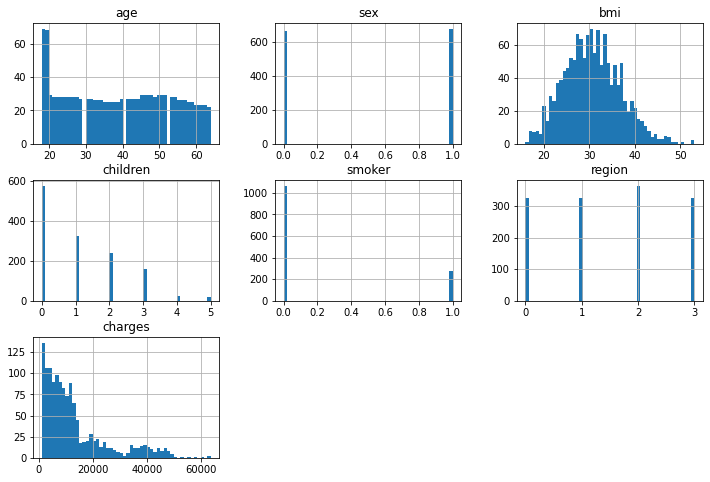

In [5]:
dataset.hist(bins=50, figsize=(12,8))
plt.show


## Look for correlations

In [251]:
corr_matrix = dataset.corr()
corr_matrix["charges"].sort_values(ascending = False)

charges     1.000000
smoker      0.787251
age         0.299008
bmi         0.198576
children    0.067998
sex         0.057292
Name: charges, dtype: float64


## Normalize and split the dataset

In [252]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

dataset[["charges"]] = scaler.fit_transform(dataset[["charges"]])

x_lin = dataset.drop(['charges'], axis = 1)
y_lin = dataset['charges']

x_lin_train, x_lin_test, y_lin_train, y_lin_test = train_test_split(x_lin, y_lin, test_size = 0.3, random_state=23)

<ipython-input-252-56e6721c64a6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[["charges"]] = scaler.fit_transform(dataset[["charges"]])
C:\dev\Anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)



## Train

In [253]:
lm = LinearRegression()
lm.fit(x_lin_train, y_lin_train)

LinearRegression()


## Predict

In [254]:
y_hat = lm.predict(x_lin_test)

print(x_lin_test)

print (y_hat [:5])

      age  sex   bmi  children  smoker
919    61    0  28.2       0.0       0
756    31    1  27.6       2.0       0
208    35    1  27.7       2.0       1
521    50    0  27.4       0.0       0
696    26    0  40.2       0.0       0
...   ...  ...   ...       ...     ...
1303   25    0  20.8       1.0       0
1192   41    0  21.8       1.0       0
1086   39    0  18.3       5.0       1
664    18    1  33.7       0.0       0
978    26    1  29.2       1.0       0

[402 rows x 5 columns]
[0.17960249 0.07181675 0.47540724 0.131955   0.10560353]


In [255]:
from sklearn.metrics import mean_absolute_error

print(lm.score(x_lin_test, y_hat))
print(mean_absolute_error(y_hat, y_lin_test))

1.0
0.06406525870024671


In [256]:
#b
lm.intercept_

-0.21141435916521675

In [257]:
#w1, w2, w3, w4, w5
lm.coef_

array([ 0.00394356, -0.00329383,  0.00533546,  0.00850803,  0.38728272])


## Measure

In [258]:
mse = mean_squared_error (y_hat, y_lin_test)

print(mse)

0.00891479507676394


## Homework

#### 1. Once you have obtained your metrics, take note of the correlation on which of the X’s have minimal impacts on y. Removing some of these features may result in an increased accuracy of your model. Begin the process of trial and error. What have you been able to achieve?

#### 2. What are the other ways of measuring the performance of your model? Which is the one you prefer for this exercise and why?

#### 3. What strategies will you use for splitting the data between Train and Test to ensure that the split is consistent across runs?

#### 4. What other normalization technique have you tried for the output column? How does your model perform?